# Homework 3

## Your Name Here (or your names here if you are pair programming)
Riley Sample
rcs3396

## Normal and t distributions
## t-test


An experiment was conducted to determine the effect of children participating in a given meal preparation on calorie intake for that meal. Data are recorded below. 

Save the data to a format that can be read into python. Read the data in for analysis. Data is provided in two separted CSV files. 

* Use python to calculate the quantities and generate the visual summaries requested below. You will lose points if you are not utilizing python.

* You can use scipy libary or other libraries to do your tests or you can implement them from scratch in python 



In [ ]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Question - 1
Summarize the data by whether children participated in the meal preparation or not. Use an appropriately labelled table to show the results. Also include a graphical presentation that shows the distribution of calories for participants vs. non-participants. Describe the shape of each distribution and comment on the similarity (or lack thereof) between the distributions in each population. **(2 points)**

Be aware that there is not one specific way the graph needs to look. Experiment with different types of graphs, and different parameters for the graph type. Your goal is to present the data as readable as possible. 

                participants       nonparticipants
mean                410.0796            374.071818
median                424.94                374.74
count                   25.0                  22.0
std               121.513786            133.139285
var             14765.600229          17726.069149
IQR     [157.92000000000002]  [149.16500000000002]



Text(0, 0.5, 'Children')

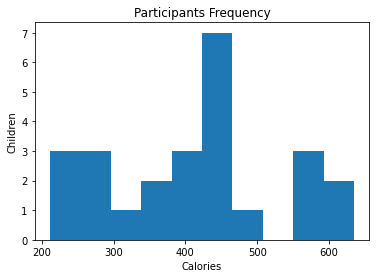

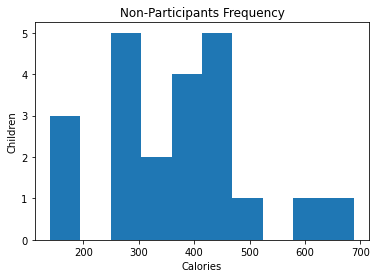

In [ ]:
# Add your code or descriptions here 
participants = pd.read_csv('participants.csv')
non_participants = pd.read_csv('nonparticipants.csv')

# create df of desc. stats
data = participants.join(non_participants)
table = data.agg({'participants': ['mean', 'median', 'count', 'std', 'var'], 
           'nonparticipants': ['mean', 'median', 'count', 'std', 'var']})

# add IQR
IQR1 = participants.quantile(.75) - participants.quantile(.25)
IQR2 = non_participants.quantile(.75) - non_participants.quantile(.25)
table.loc['IQR'] = [IQR1.values, IQR2.values] 
print(table)
print()

# chart 1
plt.figure()
plt.hist(data['participants'], 10)
plt.title('Participants Frequency')
plt.xlabel('Calories')
plt.ylabel('Children')

# chart 2
plt.figure()
plt.hist(data['nonparticipants'], 10)
plt.title('Non-Participants Frequency')
plt.xlabel('Calories')
plt.ylabel('Children')



In [ ]:
# Both histograms seem to have a similar distribution with the non-participants 
# having slightly more to support lower calorie intake indicated by the mean 
# and median. With more data points these graphs would likely align to a 
# normal distribution with very similar shape.

# Question - 2 

Does the mean calorie consumption for those who participated in the meal preparation differ from **425**? Formally test at the $\alpha = 0.05$ level using the 5 steps outlined in the module. **(6 points)**


In [ ]:
# Add your code or descriptions here 
# null = mean = 425
# alt = mean != 425

tcrit = sp.t.ppf(.90, participants.count()-1)
t, pvalue = sp.ttest_1samp(participants, 425)
t = abs(t)

print("tstat:", t)
print('tcrit:', tcrit)
print('Absolute Value of t is less than the t critical:', t < tcrit)
print('p value is less than alpha:', pvalue < .05)

# t stat < t critical, fail to reject the null
# Mean calorie consumption does not differ from 425
# We can also verify this because the pvalue is also greater than
# the alpha of .05, further supporting the null hypothesis.

tstat: [0.61393857]
tcrit: [1.31783593]
Absolute Value of t is less than the t critical: [ True]
p value is less than alpha: [False]


# Question -3 
Calculate a **90%** confidence interval for the mean calorie intake for participants in the meal preparation. Interpret the confidence interval. **(6 points)**

In [ ]:
# Add your code or descriptions here 
# mean +- z * (stdev / np.sqrt(n))
n = participants.count()
mean = participants.mean()
stdev = participants.std()

sp.t.interval(alpha=.90, df=n-1, loc=mean, scale=stdev/np.sqrt(n))



(array([368.50044816]), array([451.65875184]))

In [ ]:
# There is 90% confidence that the population mean(calorie intake)
# is between 368.50 and 451.66

# Question 4 
Formally test whether or not participants consumed 
more calories than non-participants at the $\alpha = 0.05$ level using the 5 steps procedure for hypothesis tests. **(6 points )**

In [ ]:
# Add your code or descriptions here 
# null = mean1 = mean2
# alt = mean1 != mean2
n1 = participants.count()
n2 = non_participants.count()
print('participants sample size:', n1)
print('non-participants sample size:', n2)

# use the lesser sample size to calculate df
tcrit = sp.t.ppf(1-.05, n2 - 1) 
t, pvalue = sp.ttest_ind(participants, non_participants) 
t = abs(t)

print("tstat:", t)
print('tcrit:', tcrit)
print('Absolute Value of t is less than the t critical:', t < tcrit)
print('p value is less than alpha:', pvalue < .05)


participants sample size: participants    25
dtype: int64
non-participants sample size: nonparticipants    22
dtype: int64
tstat: [0.96935044]
tcrit: [1.7207429]
Absolute Value of t is less than the t critical: [ True]
p value is less than alpha: [False]


In [ ]:
# The tstat is less than the tcrit in this case
# this indicates that we should fail to reject the null hypothesis.
# the p value also supports this as it is greater than the alpha of .05
# Therefore, there is not significant evidence that participants consume
# more calories than non-participants